In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config) 
from keras.callbacks import ModelCheckpoint



Using TensorFlow backend.


In [2]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# import numpy as np

# data=np.load('data.npy')
# target=np.load('target.npy')
# from sklearn.model_selection import train_test_split

# train_datagen,test_datagen,training_set,test_set=train_test_split(data,target,test_size=0.2)


In [3]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10356 images belonging to 2 classes.
Found 3452 images belonging to 2 classes.


In [22]:
train_dir = "dataset/Train"
test_dir = "dataset/Test"


print("Train set:\n========================================")
num_Covid19_Positive = len(os.listdir(os.path.join(train_dir, 'Covid19 Positive')))
num_Covid19_Negative = len(os.listdir(os.path.join(train_dir, 'Covid19 Negative')))

print(f"Covid19 Positive={num_Covid19_Positive}")
print(f"Covid19 Negative={num_Covid19_Negative}")


print("Test set:\n========================================")
print(f"Covid19 Positive={len(os.listdir(os.path.join(test_dir, 'Covid19 Positive')))}")
print(f"Covid19 Negative={len(os.listdir(os.path.join(test_dir, 'Covid19 Negative')))}")





Train set:
Covid19 Positive=2712
Covid19 Negative=7644
Test set:
Covid19 Positive=904
Covid19 Negative=2548


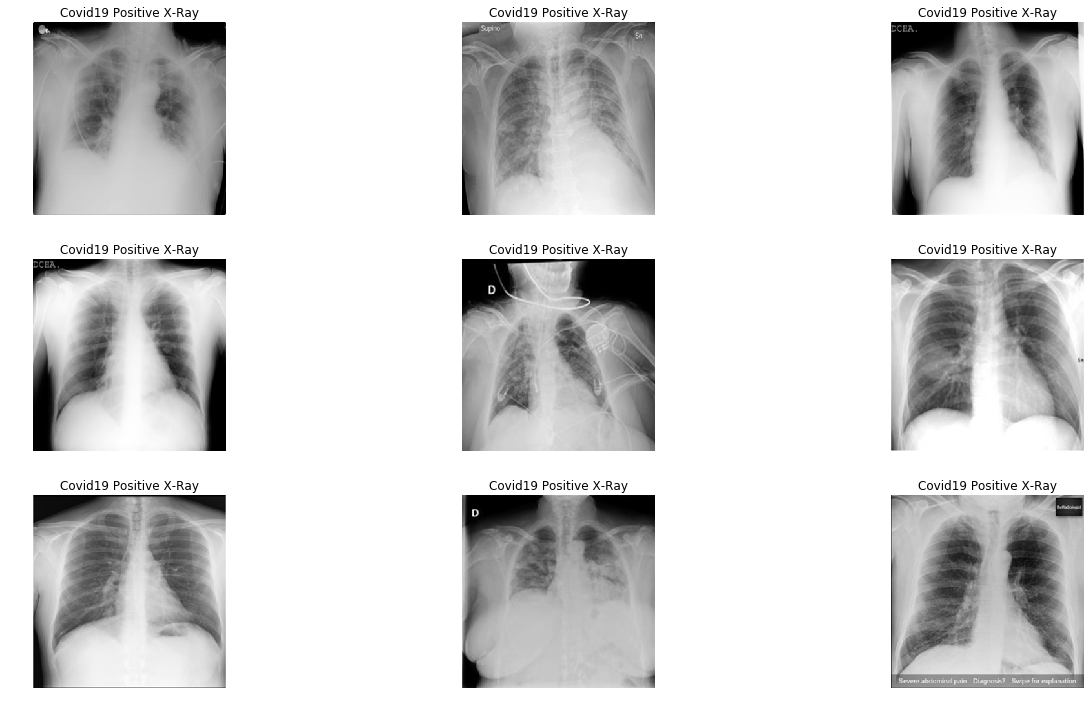

In [23]:
positive = os.listdir("dataset/Train/Covid19 Positive")
positive_dir = "dataset/train/Covid19 Positive"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(positive_dir, positive[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Covid19 Positive X-Ray") 
    
plt.tight_layout()

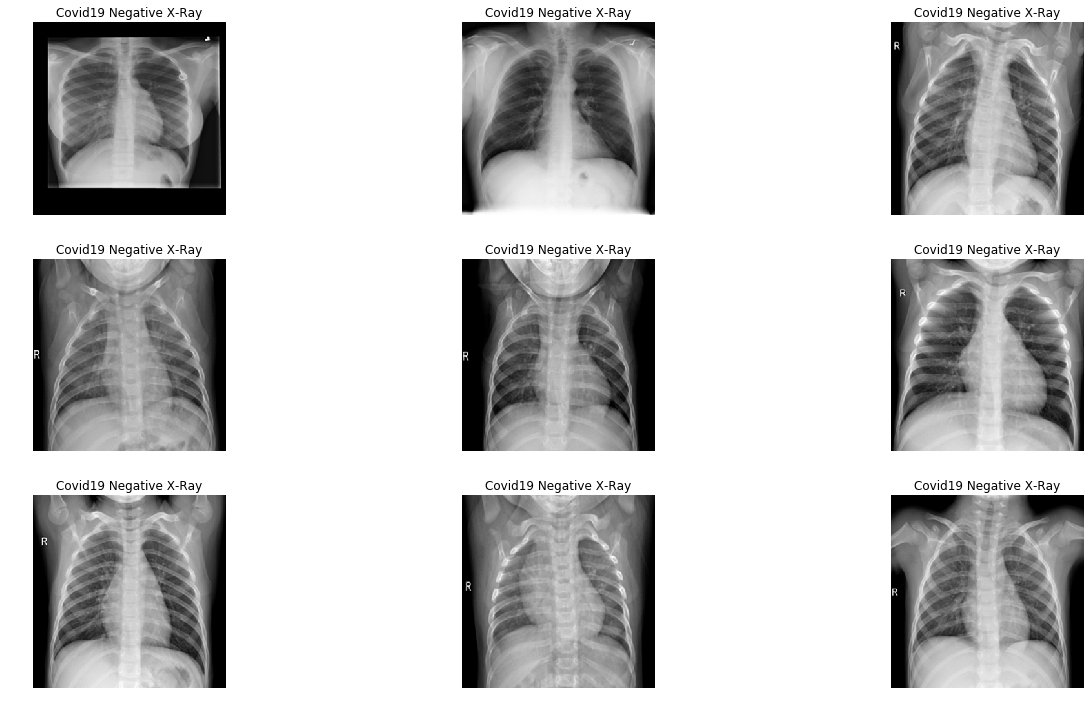

In [24]:
normal = os.listdir("dataset/Train/Covid19 Negative")
normal_dir = "dataset/Train/Covid19 Negative"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Covid19 Negative X-Ray") 
    
    
plt.tight_layout()

The dimensions of the image are 299 pixels width and 299 pixels height, one single color channel.
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.3341 and the standard deviation is 0.2795


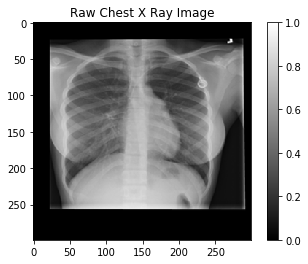

In [25]:
import os
Covid19_Negative_img = os.listdir("dataset/Train/Covid19 Negative")[0]
Covid19_Negative_dir = "dataset/Train/Covid19 Negative"
sample_img = plt.imread(os.path.join(normal_dir,Covid19_Negative_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [6]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=128,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=5, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=7, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a 4th convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=16,padding='same',kernel_size=9, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))

In [7]:
## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge')

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        204864    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          100384    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4

In [10]:
# # Part 3 - Training the CNN

# # Compiling the CNN

# # cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
# cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# # Training the CNN on the Training set and evaluating it on the Test set
# r=cnn.fit(x = training_set, validation_data = test_set, epochs = 30,callbacks=[checkpoint])

In [9]:
# Part 3 - Training the CNN

# Compiling the CNN

# cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
324/324 [==============================] - 140s 431ms/step - loss: 0.7973 - accuracy: 0.5757 - val_loss: 0.5764 - val_accuracy: 0.7381
Epoch 2/100
324/324 [==============================] - 76s 234ms/step - loss: 0.5342 - accuracy: 0.7381 - val_loss: 0.5291 - val_accuracy: 0.7381
Epoch 3/100
324/324 [==============================] - 73s 225ms/step - loss: 0.4571 - accuracy: 0.7383 - val_loss: 0.5614 - val_accuracy: 0.7381
Epoch 4/100
324/324 [==============================] - 68s 210ms/step - loss: 0.4148 - accuracy: 0.8010 - val_loss: 0.6548 - val_accuracy: 0.7656
Epoch 5/100
324/324 [==============================] - 68s 209ms/step - loss: 0.3753 - accuracy: 0.8490 - val_loss: 0.5131 - val_accuracy: 0.7891
Epoch 6/100
324/324 [==============================] - 76s 234ms/step - loss: 0.3371 - accuracy: 0.8685 - val_loss: 0.5132 - val_accuracy: 0.8027
Epoch 7/100
324/324 [==============================] - 67s 206ms/step - loss: 0.3187 - accuracy: 0.8805 - val_loss: 0.4282 

In [11]:
evaluation = cnn.evaluate(test_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = cnn.evaluate(training_set)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

108/108 [==============================] - 10s 91ms/step - loss: 0.1456 - accuracy: 0.9652
Test Accuracy: 96.52%
324/324 [==============================] - 41s 125ms/step - loss: 0.0452 - accuracy: 0.9836
Train Accuracy: 98.36%


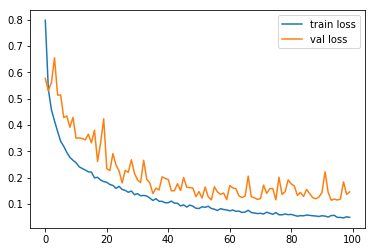

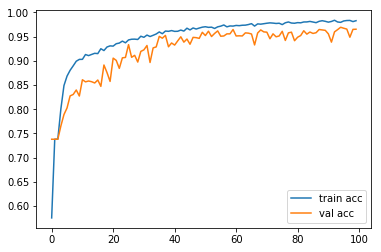

<Figure size 432x288 with 0 Axes>

In [10]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
# save it as a h5 file


from tensorflow.keras.models import load_model

# cnn.save('SvmAndCnn.h5')
cnn.save('SvmAndCnn.h5')
from tensorflow.keras.models import load_model
 


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [33]:
y_predict=cnn.predict(test_set)
y_true=test_set
res = tf.math.confusion_matrix(y_true,y_predict)

In [ ]:
'dataset/Covid19 Positive/Covid-142.png'
'dataset/Covid19 Negative/Normal-2.png'